#계층적 군집분석

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

us = pd.read_csv('/content/drive/MyDrive/datasets/USArrests.csv')
us.head()

,Unnamed: 0.1,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,1,Alaska,10.0,263,48,44.5
2,2,Arizona,8.1,294,80,31.0
3,3,Arkansas,8.8,190,50,19.5
4,4,California,9.0,276,91,40.6


In [12]:
us.drop(['Unnamed: 0.1'], axis = 1, inplace = True)
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [21]:
us.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


#최단 연결법 유클리디안

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


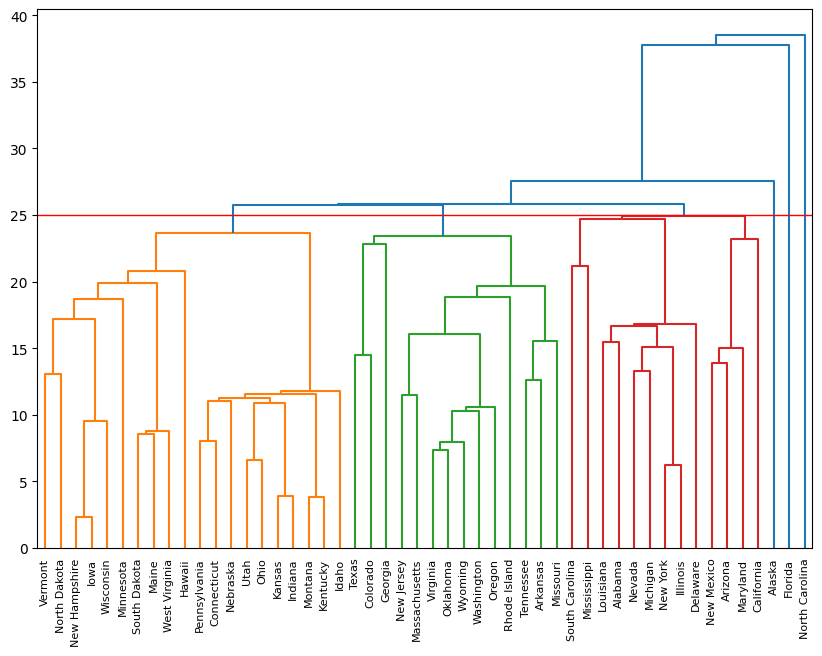

In [26]:
labelList = us.State.tolist()
print(labelList)
single = linkage(us.iloc[:, 1::],metric = 'euclidean', method = 'single')

plt.figure(figsize = (10, 7))
dendrogram(single, orientation = 'top',
           labels = labelList,
           distance_sort = 'descending',
           color_threshold = 25, #군집의 수를 설정하는 height 값 t -> 25
           show_leaf_counts = True)
plt.axhline(y = 25, color = 'r',
            linewidth = 1 )
plt.show()

#와드연결법이 덴드로 그램 군집을 해석하기 쉬움.

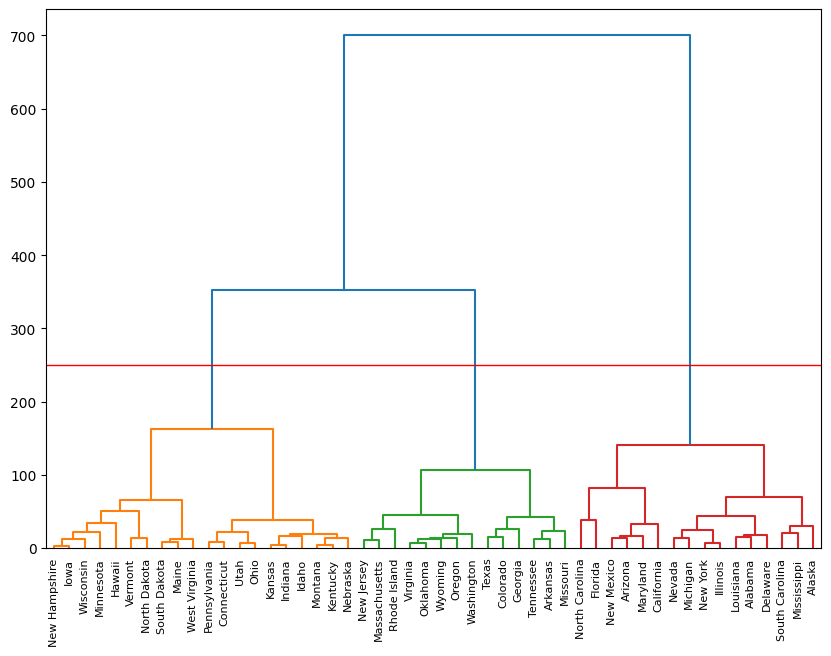

In [29]:
ward= linkage(us.iloc[:, 1::],metric = 'euclidean', method = 'ward')

plt.figure(figsize = (10, 7))
dendrogram(ward, orientation = 'top',
           labels = labelList,
           distance_sort = 'descending',
           color_threshold = 250, #군집의 수를 설정하는 height 값 t -> 25
           show_leaf_counts = True)
plt.axhline(y = 250, color = 'r',linewidth = 1 )
plt.show()

In [31]:
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [32]:
us['cluster'] = assignments
us.groupby('cluster').mean()


<ipython-input-32-8fca9fe23ae6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  us.groupby('cluster').mean()


,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


#비계층적 군집분석

In [33]:
import pandas as pd
from sklearn.cluster import KMeans

iris = pd.read_csv('/content/drive/MyDrive/datasets/iris.csv')
iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,target
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
iris.drop(['Unnamed: 0'], axis = 1, inplace = True)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
x = iris.drop('target', axis = 1)
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
from sklearn.metrics import calinski_harabasz_score
for k in range(2, 10): #k=3 일 때 가장 높은 값을 가짐 560.399
  kmeans_model = KMeans(n_clusters = k, random_state = 1).fit(x)
  labels = kmeans_model.labels_
  print(calinski_harabasz_score(x, labels))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


513.3038433517568
560.3999242466402
529.1207190840455
494.0943819140986
474.51742958716295


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


448.8714494416451
436.61302488142496
414.5303174051382


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

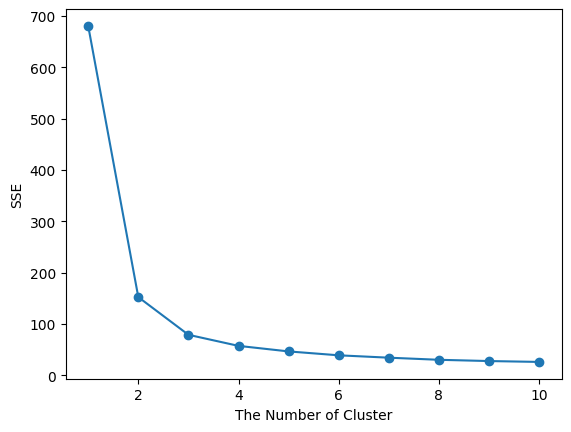

[680.8244000000001, 152.36870647733906, 78.940841426146, 57.34540931571814, 46.53558205128205, 38.95701115711986, 34.326529914529914, 30.227724598930486, 27.766706937799043, 26.072251823340057]


In [40]:
import matplotlib.pyplot as plt
def elbow(x):
  sse = []
  for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 1)
    km.fit(x)
    sse.append(km.inertia_)
  plt.plot(range(1, 11), sse, marker = 'o')
  plt.xlabel('The Number of Cluster')
  plt.ylabel('SSE')
  plt.show()
  print(sse)

elbow(x) # k = 3일때 가장 SSE가 많이 떨어진다. 따라서 군집의 수는 3이 적당함

In [41]:
km = KMeans(n_clusters = 3, random_state = 1)
km.fit(x)
new_labels = km.labels_
iris['cluster'] = new_labels
iris.groupby(['cluster']).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-41-c8d7661639f1>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iris.groupby(['cluster']).mean()


,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


# 군집을 검정하기 위해 anova 분석이 필요 또는 시각화를 통해 확인

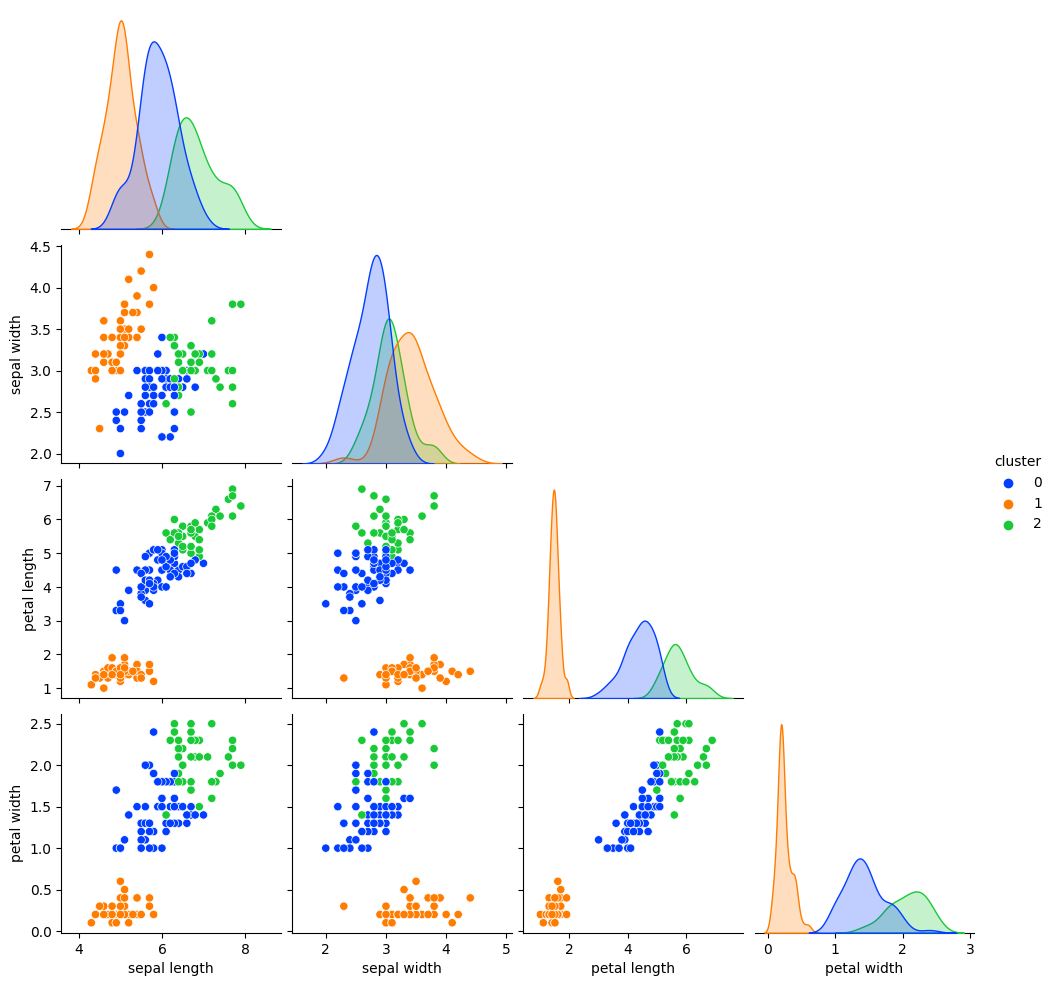

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris, diag_kind = 'kde', hue = 'cluster', corner =True, palette = 'bright')
plt.show()

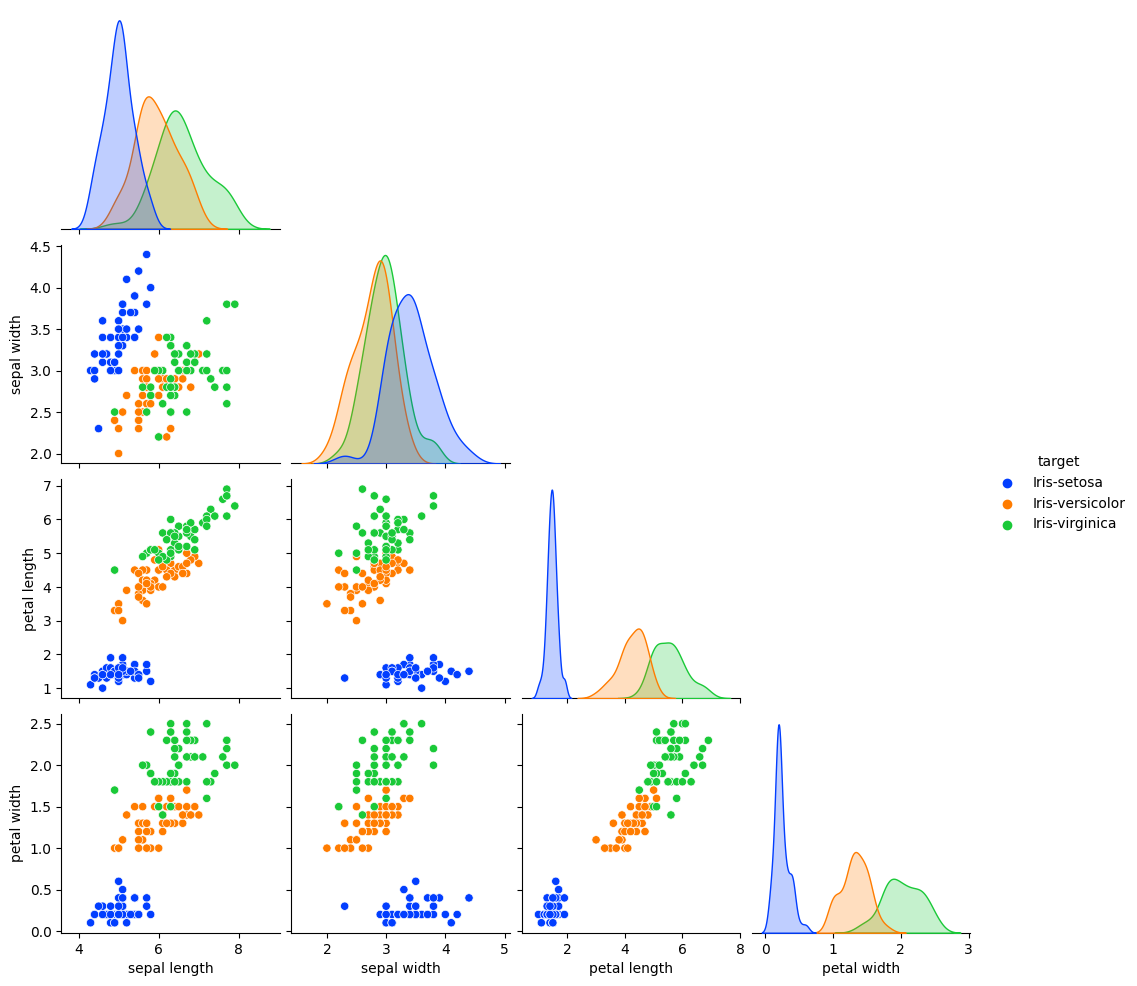

In [44]:
sns.pairplot(iris.drop(columns = ['cluster']), diag_kind = 'kde', hue = 'target', corner =True, palette = 'bright')
plt.show()

#혼합분포 군집 분석 군집의 정규분포일 경우 사용(이상치에 민감)

In [46]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

df = iris.drop('target', axis = 1)
scale = StandardScaler()
df_scaled = scale.fit_transform(df)

gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [49]:
df['gmm_cluster'] = gmm_labels
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width,cluster
gmm_cluster,,,,,
0,6.850000,3.073684,5.742105,2.071053,2.0
1,5.901613,2.748387,4.393548,1.433871,0.0
2,5.006000,3.418000,1.464000,0.244000,1.0


#k-mean 은 원형분포를 DBSCAN은 반달 모양분포를 혼합분포는 다각형분포를 잘 분류함

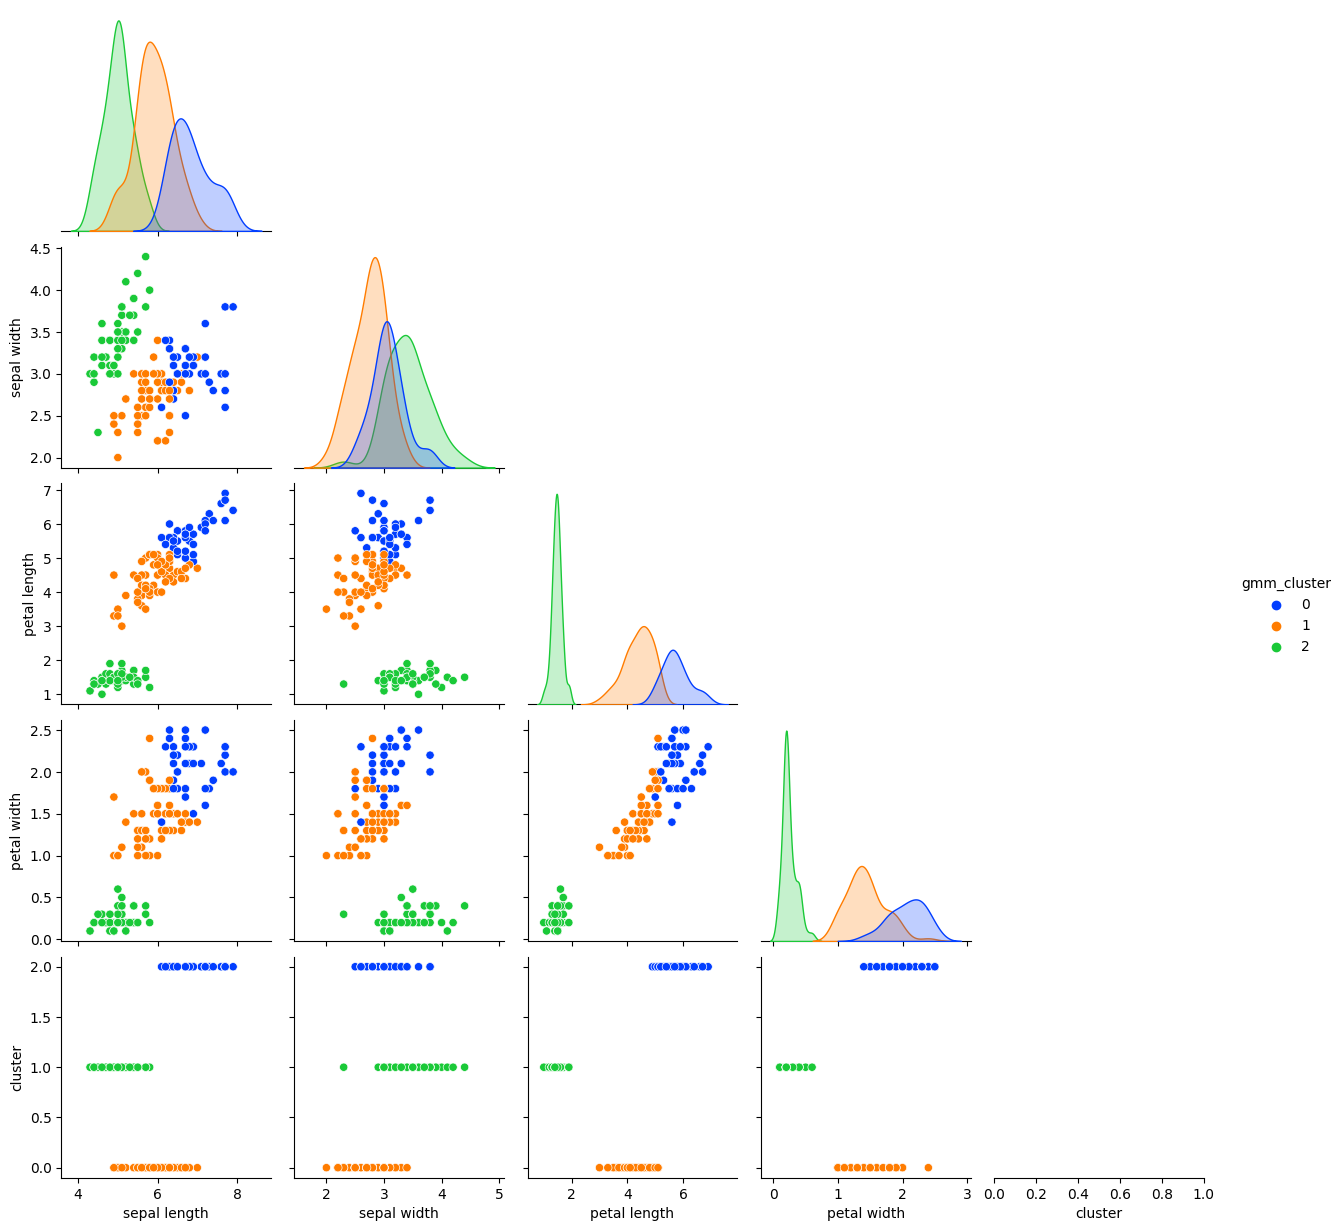

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, diag_kind = 'kde',
             hue = 'gmm_cluster',
             corner = True,
             palette = 'bright')
plt.show()
